In [ ]:
# This model trains an expected goals model using ML
# This model is slightly different than Opta or StatsBomb models because they have more data and more data points for every specific shot, so their model would be more accurate to calculate true xG values
# This model just used a web scraped data

In [ ]:
# conda create -n soccer_env python=3.10
# conda activate soccer_env
# pip install ipykernel
# python -m ipykernel install --user --name soccer_env --display-name "Python (Soccer)"
# !pip install pandas numpy matplotlib seaborn mplsoccer scikit-learn

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Masaüstü\Footbal Data Science\xg_model.csv")

# Data Exploration & Cleaning

In [2]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Looking at the shape of our data

df.shape

(8118, 25)

In [ ]:
# Our model has 8000 rows and 25 columns, a legit model would have couple million shots in points to train and test

In [4]:
# Looking at some of our ranges for x and y

print(df.x.max())
print(df.x.min())

99.6
0.8


In [ ]:
# x (horizontal axis) and y (vertical axis) are shot coordinates (pitch is a sideway pitch)
# Highest value of x is 99.6 
# Somebody took a shot from a point which really close to its own goal - min shot (0.8)

In [5]:
print(df.y.max())
print(df.y.min())

99.6
3.1


In [6]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [ ]:
# Target variable will be is_goal variable (trying to predict the shot end in a goal)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x                8118 non-null   float64
 1   y                8118 non-null   float64
 2   is_goal          8118 non-null   bool   
 3   period           8118 non-null   object 
 4   Assisted         6038 non-null   object 
 5   Zone             8118 non-null   object 
 6   IndividualPlay   2802 non-null   object 
 7   RegularPlay      5390 non-null   object 
 8   LeftFoot         2791 non-null   object 
 9   RightFoot        3994 non-null   object 
 10  FromCorner       1194 non-null   object 
 11  FirstTouch       3925 non-null   object 
 12  Head             1300 non-null   object 
 13  BigChance        1607 non-null   object 
 14  SetPiece         393 non-null    object 
 15  Volley           810 non-null    object 
 16  FastBreak        616 non-null    object 
 17  ThrowinSetPiec

In [8]:
# Getting rid of some columns that aren't going to help 

df.drop(["DirectFreekick", "DirectCorner"], axis = 1, inplace = True)

In [9]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OwnGoal',
       'OtherBodyPart'],
      dtype='object')

In [10]:
# Looking at the OwnGoal column since it wont be included in the model because it doesnt have xG

df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

In [11]:
# Dropping the own goals from data (deleting rows then dropping column)

df = df[df['OwnGoal'] != True]
df.drop(['OwnGoal'], axis = 1, inplace = True)

In [12]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart'],
      dtype='object')

In [13]:
df.shape

(8091, 22)

In [14]:
# Looking at value counts and percentage for is_goal column

print(df.is_goal.value_counts())
print("")
print(df.is_goal.value_counts(normalize = True))

is_goal
False    7097
True      994
Name: count, dtype: int64

is_goal
False    0.877147
True     0.122853
Name: proportion, dtype: float64


<Axes: xlabel='x', ylabel='y'>

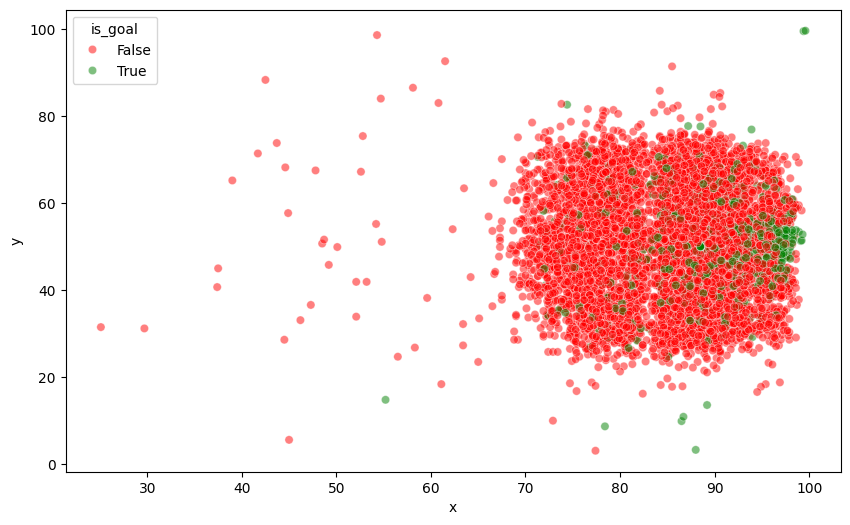

In [15]:
# Plotting the distribution of x and y values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'x', y = 'y', data = df, hue = 'is_goal', palette = ['red', 'green'], alpha = 0.5)

In [16]:
# Looking how many "Null" values are there in columns

df.isna().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
OtherBodyPart      8067
dtype: int64

In [17]:
# Replacing all "Null" values with "False"

df.fillna(0, inplace = True)

In [18]:
df.isna().sum()

x                  0
y                  0
is_goal            0
period             0
Assisted           0
Zone               0
IndividualPlay     0
RegularPlay        0
LeftFoot           0
RightFoot          0
FromCorner         0
FirstTouch         0
Head               0
BigChance          0
SetPiece           0
Volley             0
FastBreak          0
ThrowinSetPiece    0
Penalty            0
OneOnOne           0
KeyPass            0
OtherBodyPart      0
dtype: int64

In [19]:
# Checking data types of columns

df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
OtherBodyPart       object
dtype: object

In [20]:
# Casting all of the columns to the correct data types (Changing "object" data types to "bool")

df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [21]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

# Feature Engineering

In [ ]:
# Few features will be engineered to help the model

In [22]:
# 1- Adding shot distance column

goal_x = 100  # On a standard Opta/StatsBomb pitch, the goal is at the far right edge (x = 100)
goal_y = 50   # The goal is exactly in the middle of the pitch width (y = 50)

# Shot distance - Euclidean distance from the goal

df["shot_distance"] = np.sqrt((df['x'] - goal_x)**2 + (df['y'] - goal_y)**2)

In [23]:
df["shot_distance"]

0       19.266551
1       33.077636
2       22.141590
3       11.636151
4       16.323296
          ...    
8113    20.999048
8114     7.665507
8115    16.697305
8116    10.572133
8117    15.686937
Name: shot_distance, Length: 8091, dtype: float64

In [24]:
# Looking "shot_distance" distribution with numerical scale

df["shot_distance"].describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

<Axes: >

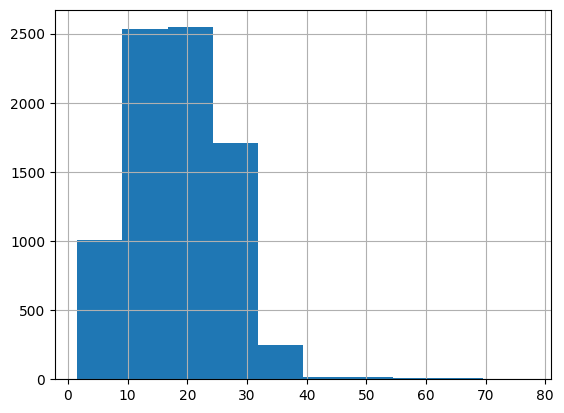

In [25]:
# Looking "shot_distance" distribution with histogram

df["shot_distance"].hist()

In [ ]:
# 2- Categorical encoding (Turning string (object) columns to binary (bool) values)

In [26]:
# Looking string column "period"

df.period.value_counts()

period
SecondHalf    4333
FirstHalf     3758
Name: count, dtype: int64

In [27]:
# Looking string column "Zone"

df.Zone.value_counts()

Zone
Center    8020
Left        30
Right       23
Back        18
Name: count, dtype: int64

In [28]:
# Encoding those categorical columns

df = pd.get_dummies(df, columns = ['period', 'Zone'])

In [29]:
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [30]:
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [31]:
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

In [32]:
df.Zone_Back.value_counts()

Zone_Back
False    8073
True       18
Name: count, dtype: int64

In [33]:
df.Zone_Center.value_counts()

Zone_Center
True     8020
False      71
Name: count, dtype: int64

In [34]:
df.Zone_Left.value_counts()

Zone_Left
False    8061
True       30
Name: count, dtype: int64

In [35]:
df.Zone_Right.value_counts()

Zone_Right
False    8068
True       23
Name: count, dtype: int64

In [36]:
df.head()

,x,y,is_goal,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,...,OneOnOne,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right
0,80.8,51.6,False,True,True,True,True,False,False,False,...,False,False,False,19.266551,False,True,False,True,False,False
1,79.3,24.2,False,True,True,True,False,True,False,False,...,False,False,False,33.077636,False,True,False,True,False,False
2,80.0,59.5,False,True,False,False,False,True,True,False,...,False,False,False,22.141590,False,True,False,True,False,False
3,89.8,55.6,False,True,False,False,False,False,True,True,...,False,False,False,11.636151,False,True,False,True,False,False
4,84.9,56.2,False,True,False,True,True,False,False,False,...,False,False,False,16.323296,False,True,False,True,False,False


# Model Building

In [37]:
# Defining all features (X) and target variable (y)

X = df.drop('is_goal', axis = 1)
y = df['is_goal']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [39]:
# Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
# Implementing Logistic Regression

model = LogisticRegression(max_iter = 1000)

In [41]:
# Fitting the model

model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\envs\soccer_env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
# Calculating the "xG value" for every shot in test set

y_pred_proba = model.predict_proba(X_test)[:, 1]

In [43]:
# Some calculated probabilities of a goal

y_pred_proba[0:10]

array([0.07326635, 0.34984142, 0.03617388, 0.03778778, 0.09935013,
       0.03776818, 0.03495099, 0.04808141, 0.04589519, 0.03861217])

In [44]:
# Attaching these probabilities to test data

final_df = X_test.copy()
final_df['goal_probability'] = y_pred_proba

In [45]:
# Checking some calculated xG value

final_df.iloc[830]

x                         79.1
y                         70.3
Assisted                 False
IndividualPlay           False
RegularPlay              False
LeftFoot                  True
RightFoot                False
FromCorner               False
FirstTouch               False
Head                     False
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                False
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        29.135889
period_FirstHalf          True
period_SecondHalf        False
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability       0.06152
Name: 1808, dtype: object

In [46]:
final_df.iloc[100]

x                        97.0
y                        42.2
Assisted                 True
IndividualPlay          False
RegularPlay              True
LeftFoot                False
RightFoot                True
FromCorner              False
FirstTouch               True
Head                    False
BigChance                True
SetPiece                False
Volley                   True
FastBreak               False
ThrowinSetPiece         False
Penalty                 False
OneOnOne                False
KeyPass                 False
OtherBodyPart           False
shot_distance        8.357033
period_FirstHalf        False
period_SecondHalf        True
Zone_Back               False
Zone_Center              True
Zone_Left               False
Zone_Right              False
goal_probability     0.353474
Name: 7880, dtype: object

In [47]:
# Looking to highest xG value shots

final_df.sort_values(by = 'goal_probability', ascending = False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.837630
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.837630
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.837630
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.837630
473,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,True,False,False,True,False,False,0.834073


In [ ]:
# First 4 highest xG value shots are probably penalty because they have same xG and distance

In [48]:
# Evaluating the model

logloss = log_loss(y_test, y_pred_proba)   # 
roc_auc = roc_auc_score(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.2694692911987937
ROC AUC: 0.8109074382669292
Brier Score: 0.077244163826819


# Summary of scores

In [ ]:
# Log Loss: How well the model predicts the probabilities of the classes
# ROC AUC: The area under the ROC curve. (To evaluate how well the model separates the classes)
# Brier Score: Measures the mean squared difference between the predicted probabilities and the actual outcomes

In [ ]:
# Plotting the actual xG model

In [49]:
from mplsoccer import Pitch

pitch = Pitch(pitch_type = 'opta')

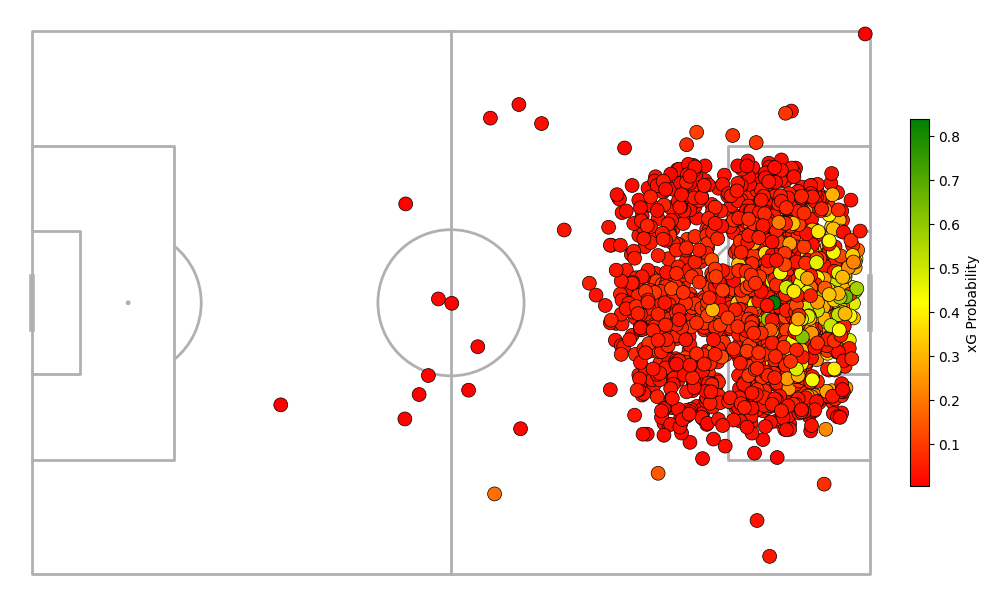

In [50]:
from matplotlib.colors import LinearSegmentedColormap

# Defining the colors for the gradient

colors = ['red', 'yellow', 'green']

# Creating the custom colormap

cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = pitch.draw(figsize = (10, 8))

# Scatter plot for shots with xG as the color

sc = pitch.scatter(
    final_df['x'], 
    final_df['y'],    # Shot coordinates
    c = final_df['goal_probability'],   # xG probabilities for color
    cmap = cmap,    # Red to green gradient
    edgecolors = 'black', linewidth = 0.5, s = 100,    # Point styling
    ax = ax
)

# Adding a color bar to indicate xG values

cbar = plt.colorbar(sc, ax = ax, orientation = 'vertical', fraction = 0.02, pad = 0.02)
cbar.set_label('xG Probability')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, classification_report

lr = LogisticRegression()

# Defining the hyperparameters to search

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],   # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength 
    'solver': ['liblinear', 'saga'],               # Solver for optimization
    'max_iter': [100, 500, 1000]                   # Maximum number of iterations
}

# Defining the scoring metric

scorer = make_scorer(roc_auc_score, needs_proba = True)

# Setting up GridSearchCV

grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = scorer,
    cv = 3,               # 3-fold cross-validation
    verbose = 1,
    n_jobs = -1
)                          # Using all processors for parallelism

# Fitting the model

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


C:\Users\Lenovo\anaconda3\envs\soccer_env\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
135 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\envs\soccer_env\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\envs\soccer_env\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Lenovo\anaconda3\envs\soccer_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, i

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 500, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['liblinear', 'saga']}"
,scoring,make_scorer(r...ds_proba=True)
,n_jobs,-1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [52]:
# Getting  the best parameters and best score

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Using the best model to make predictions

best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluating the model on the test set

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.4f}")

# Printing classification report

y_pred = (y_pred_proba > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score: nan
Test ROC AUC Score: 0.7920

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94      1435
        True       0.00      0.00      0.00       184

    accuracy                           0.89      1619
   macro avg       0.44      0.50      0.47      1619
weighted avg       0.79      0.89      0.83      1619



In [53]:
model = LogisticRegression(C = 100, max_iter = 100, penalty = 'l1', solver = 'liblinear')

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.2697819435889718
ROC AUC: 0.812278442660203
Brier Score: 0.07746607938570928
